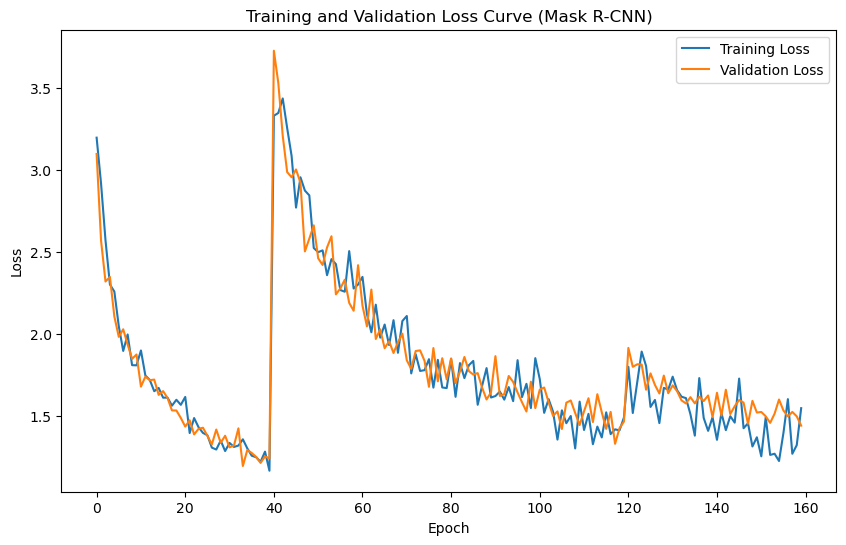

In [2]:
import re
import matplotlib.pyplot as plt

def extract_losses(line):
    match = re.search(r' - loss: (\d+\.\d+).* - val_loss: (\d+\.\d+)', line)
    if match:
        training_loss = float(match.group(1))
        validation_loss = float(match.group(2))
        return training_loss, validation_loss
    else:
        return None, None

def plot_loss_curve(log_file):
    epochs = []
    training_losses = []
    validation_losses = []

    with open(log_file, 'r') as file:
        lines = file.readlines()

    for line in lines:
        training_loss, validation_loss = extract_losses(line)
        if training_loss is not None and validation_loss is not None:
            training_losses.append(training_loss)
            validation_losses.append(validation_loss)

    plt.figure(figsize=(10, 6))
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve (Mask R-CNN)')
    plt.legend()
    plt.show()

log_file_path = 'maskrcnn_logs.txt'
plot_loss_curve(log_file_path)